# Exercise M5.02

The aim  of this exercise is to find out whether a decision tree model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the range of  feature values seen during the training.

In [2]:
import pandas as pd
import numpy as np

penguins = pd.read_csv('data/penguins_regression.csv')
data = ['Flipper Length (mm)']
target = 'Body Mass (g)'

data_train, target_train = penguins[data], penguins[target]

First, create two models, a linear regression model and a decision tree regression model, and fit them on the training data. Limit the depth at 3 levels for the decision tree.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

np.random_state = 23

# model initiation
lin_model = LinearRegression()
dt_model = DecisionTreeRegressor(max_depth=3)

# model fitting
lin_model.fit(data_train, target_train)
dt_model.fit(data_train, target_train)


DecisionTreeRegressor(max_depth=3)

Create a testing dataset, ranging from the minimum to the maximum of the flipper length of the training dataset. Get the predictions of each model using this test dataset

In [6]:
data_test = pd.DataFrame(np.arange(data_train[data[0]].min(),
                                   data_train[data[0]].max()),
                         columns=data)

In [15]:
predicted_lin_reg = lin_model.predict(data_test)
predicted_dt = dt_model.predict(data_test)

Create a scatter plot containing the training samples and superimpose the predictions of both model on the top

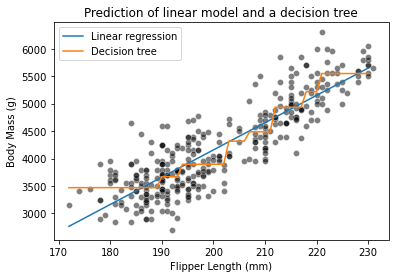

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
                color="black", alpha=0.5)
plt.plot(data_test, predicted_lin_reg,
         label="Linear regression")
plt.plot(data_test, predicted_dt, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

The predictions that we got were within the range of feature values seen during training. In some sense, we observe the capabilities of our model to interpolate